In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras import models
from keras import layers
!pip install opendatasets
import opendatasets as od

od.download("https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci")

Skipping, found downloaded files in "./heart-disease-cleveland-uci" (use force=True to force download)


In [2]:
data = pd.read_csv('./heart-disease-cleveland-uci/heart_cleveland_upload.csv')

Each data instance is a patient, each patient has 13 attirbutes.

Attributes:

1. Age (years)
2. Sex (0 = female, 1 = male)
3. cp: chest pain type
* Value 0: typical angina
* Value 1: atypical angina
* Value 2: non-anginal pain
* Value 3: asymptomatic
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestorol in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg: resting electrocardiographic results
* Value 0: normal
* Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
* Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
* Value 0: upsloping
* Value 1: flat
* Value 2: downsloping
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

Label: condition: 0 = no disease, 1 = disease

No instances have null attributes

In [3]:
print(data.isnull().sum())

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64


No duplicates

In [4]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
292    False
293    False
294    False
295    False
296    False
Length: 297, dtype: bool

In [5]:
copy = data.copy()
copy.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


297 instances. Randomize before splitting training and validation data

In [6]:
copy.info()
randomizedcopy = copy.sample(frac=1)
randomizedcopy.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
216,58,1,3,128,259,0,2,130,1,3.0,1,2,2,1
277,45,1,3,142,309,0,2,147,1,0.0,1,3,2,1
259,51,0,3,130,305,0,0,142,1,1.2,1,0,2,1
127,50,1,2,129,196,0,0,163,0,0.0,0,0,0,0
181,63,0,3,108,269,0,0,169,1,1.8,1,2,0,1


In [7]:
dataset = randomizedcopy.values
data.shape

(297, 14)

Seperate the data from labels, convert all data to float

In [8]:
X = dataset[:,0:12].astype(float) # number of cols-1
Y = dataset[:,13].astype(float)

Seperate training and test data/labels

In [9]:
train_data = X[0:205,:]
train_labels = Y[0:205]
test_data = X[206:,:]
test_labels = Y[206:]

Each instance has 13 attributes, and a label indicating prescense of heart disease

In [10]:
print(train_data)
print(train_labels)

[[58.   1.   3.  ...  3.   1.   2. ]
 [45.   1.   3.  ...  0.   1.   3. ]
 [51.   0.   3.  ...  1.2  1.   0. ]
 ...
 [43.   1.   3.  ...  1.5  0.   0. ]
 [54.   1.   3.  ...  1.4  1.   1. ]
 [77.   1.   3.  ...  0.   0.   3. ]]
[1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1.
 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0.
 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1.
 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0.
 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0.
 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0.
 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1.]


Standardize training and validation data since attributes have different ranges (note: use mean and standard deviation of training data to normalize validation data)

In [11]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std
print(train_data)

[[ 0.41087872  0.70452137  0.86102413 ...  1.96343473  0.63191566
   1.47192339]
 [-0.95274743  0.70452137  0.86102413 ... -0.96174056  0.63191566
   2.53815764]
 [-0.32338151 -1.41940335  0.86102413 ...  0.20832956  0.63191566
  -0.66054512]
 ...
 [-1.16253606  0.70452137  0.86102413 ...  0.50084709 -1.02888832
  -0.66054512]
 [-0.00869855  0.70452137  0.86102413 ...  0.40334124  0.63191566
   0.40568913]
 [ 2.40387079  0.70452137  0.86102413 ... -0.96174056 -1.02888832
   2.53815764]]


Build model 4 from trials. A sequential model consisting of an input layer, hidden layer, and output layer. input and hidden layers have relu activation functions while output has a sigmoid activation. Size of layers are 8 aside from output layer of size 1. 

To prevent overfitting:
- We can reduce overfitting by using smaller layers and by using dropout. Dropout sets the output of a fraction of nodes to zero (the nodes are chosen at random). This noise helps prevent coincidental patterns from being memorized by the model.
- add L2 regularization. Regularization will add a penalty to the cost function for any large weight coefficient values, encouraging small distribution of weight coefficients

In [12]:
from keras import regularizers
def build_model4():
    model = models.Sequential()
    model.add(layers.Dense(8, activation='relu', kernel_regularizer=regularizers.L2(0.001),
    input_shape=(train_data.shape[1],)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(8, activation='relu', kernel_regularizer=regularizers.L2(0.001)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy'])
    return model

Not a lot of data available. So use K-fold cross validation. k = 4. Set up arrays to track history of validation and training loss/accuracy. Train each model with 75 epochs

In [17]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 75
all_scores = []
all_val_loss_histories = []
all_train_loss_histories = []
all_val_acc_histories = []
all_train_acc_histories = []

In [18]:
for i in range(k):
    #prepare validation data
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_labels[i * num_val_samples: (i + 1) * num_val_samples]
    
    #prepare training data
    partial_train_data = np.concatenate(
    [train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate(
    [train_labels[:i * num_val_samples],
    train_labels[(i + 1) * num_val_samples:]],
    axis=0)
    
    model = build_model4()
    history = model.fit(partial_train_data, partial_train_targets, validation_data=(val_data, val_targets),
    epochs=num_epochs, batch_size=5)
    train_history = history.history['loss']
    val_history = history.history['val_loss']
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    all_train_loss_histories.append(train_history)
    all_val_loss_histories.append(val_history)
    all_train_acc_histories.append(train_acc)
    all_val_acc_histories.append(val_acc)

processing fold # 0
Epoch 1/75
31/31 [==============================] - 2s 31ms/step - loss: 0.8399 - accuracy: 0.4091 - val_loss: 0.7510 - val_accuracy: 0.4118
Epoch 2/75
31/31 [==============================] - 1s 21ms/step - loss: 0.8098 - accuracy: 0.5000 - val_loss: 0.7354 - val_accuracy: 0.4314
Epoch 3/75
31/31 [==============================] - 1s 21ms/step - loss: 0.7678 - accuracy: 0.4805 - val_loss: 0.7211 - val_accuracy: 0.4118
Epoch 4/75
31/31 [==============================] - 1s 21ms/step - loss: 0.7807 - accuracy: 0.4026 - val_loss: 0.7087 - val_accuracy: 0.5098
Epoch 5/75
31/31 [==============================] - 1s 21ms/step - loss: 0.7562 - accuracy: 0.4805 - val_loss: 0.7002 - val_accuracy: 0.5882
Epoch 6/75
31/31 [==============================] - 1s 21ms/step - loss: 0.7519 - accuracy: 0.4610 - val_loss: 0.6946 - val_accuracy: 0.6078
Epoch 7/75
31/31 [==============================] - 1s 21ms/step - loss: 0.6724 - accuracy: 0.5714 - val_loss: 0.6907 - val_accuracy: 

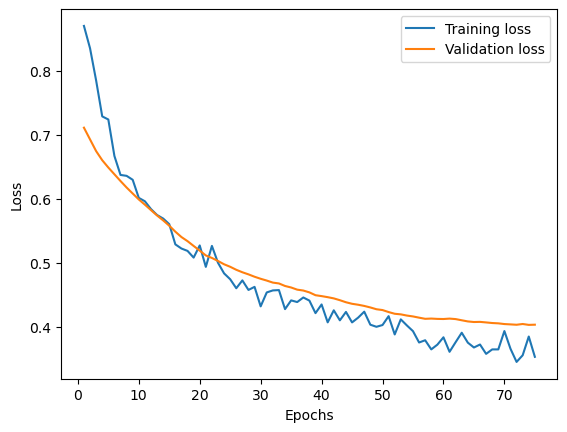

In [19]:
average_train_loss = [np.mean([x[i] for x in all_train_loss_histories]) for i in range(num_epochs)]
average_val_loss = [np.mean([x[i] for x in all_val_loss_histories]) for i in range(num_epochs)]
average_train_acc = [np.mean([x[i] for x in all_train_acc_histories]) for i in range(num_epochs)]
average_val_acc = [np.mean([x[i] for x in all_val_acc_histories]) for i in range(num_epochs)]
plt.plot(range(1, len(average_val_loss) + 1), average_train_loss, label='Training loss')
plt.plot(range(1, len(average_val_loss) + 1), average_val_loss, label='Validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Average validation accuracy of model reaches around 83% after 75 epochs

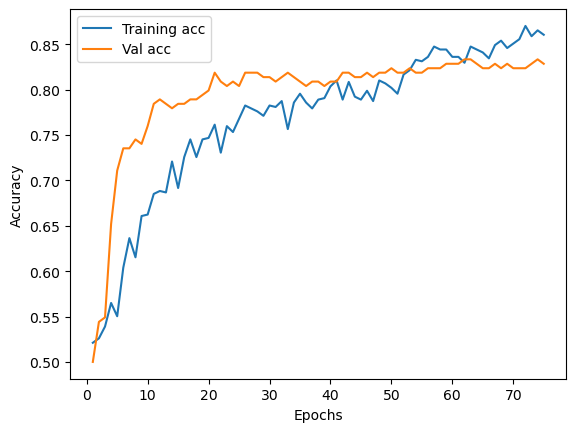

In [20]:
plt.clf()
plt.plot(range(1, len(average_val_loss) + 1), average_train_acc, label='Training acc')
plt.plot(range(1, len(average_val_loss) + 1), average_val_acc, label='Val acc')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()
plt.show()

Train final model on all of the data and test

In [26]:
final_model = build_model4()
history = final_model.fit(train_data, train_labels, epochs=75, batch_size=5)

Epoch 1/75
41/41 [==============================] - 2s 22ms/step - loss: 0.9355 - accuracy: 0.4878
Epoch 2/75
41/41 [==============================] - 1s 19ms/step - loss: 0.7689 - accuracy: 0.5951
Epoch 3/75
41/41 [==============================] - 1s 19ms/step - loss: 0.7135 - accuracy: 0.5512
Epoch 4/75
41/41 [==============================] - 1s 18ms/step - loss: 0.7471 - accuracy: 0.5512
Epoch 5/75
41/41 [==============================] - 1s 19ms/step - loss: 0.7281 - accuracy: 0.5805
Epoch 6/75
41/41 [==============================] - 1s 19ms/step - loss: 0.6623 - accuracy: 0.6293
Epoch 7/75
41/41 [==============================] - 1s 19ms/step - loss: 0.6943 - accuracy: 0.6000
Epoch 8/75
41/41 [==============================] - 1s 19ms/step - loss: 0.6516 - accuracy: 0.6293
Epoch 9/75
41/41 [==============================] - 1s 19ms/step - loss: 0.6292 - accuracy: 0.6634
Epoch 10/75
41/41 [==============================] - 1s 19ms/step - loss: 0.6414 - accuracy: 0.6683
Epoch 11/

In [28]:
test_loss, test_acc = final_model.evaluate(test_data, test_labels, batch_size=2)

46/46 [==============================] - 1s 14ms/step - loss: 0.5969 - accuracy: 0.7033


In [29]:
test_acc

0.7032967209815979

Model has an accuracy of 70% on test data. Try model 3 from trials. This model is the same except no regularization

In [30]:
def build_model3():
    model = models.Sequential()
    model.add(layers.Dense(8, activation='relu',
    input_shape=(train_data.shape[1],)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(8, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy'])
    return model

In [31]:
final_model2 = build_model3()
history = final_model2.fit(train_data, train_labels, epochs=75, batch_size=5)

Epoch 1/75
41/41 [==============================] - 1s 13ms/step - loss: 0.7529 - accuracy: 0.4927
Epoch 2/75
41/41 [==============================] - 0s 9ms/step - loss: 0.7170 - accuracy: 0.5463
Epoch 3/75
41/41 [==============================] - 0s 9ms/step - loss: 0.7239 - accuracy: 0.5512
Epoch 4/75
41/41 [==============================] - 0s 10ms/step - loss: 0.6965 - accuracy: 0.5707
Epoch 5/75
41/41 [==============================] - 0s 9ms/step - loss: 0.6899 - accuracy: 0.5756
Epoch 6/75
41/41 [==============================] - 0s 9ms/step - loss: 0.6700 - accuracy: 0.5951
Epoch 7/75
41/41 [==============================] - 0s 9ms/step - loss: 0.6333 - accuracy: 0.6732
Epoch 8/75
41/41 [==============================] - 0s 9ms/step - loss: 0.6449 - accuracy: 0.6829
Epoch 9/75
41/41 [==============================] - 0s 9ms/step - loss: 0.6293 - accuracy: 0.6634
Epoch 10/75
41/41 [==============================] - 0s 9ms/step - loss: 0.6164 - accuracy: 0.6829
Epoch 11/75
41/41

In [32]:
test_loss2, test_acc2 = final_model2.evaluate(test_data, test_labels, batch_size=2)

46/46 [==============================] - 1s 7ms/step - loss: 0.6601 - accuracy: 0.7363


Final model accuracy on test data is 73%